# Advent of Code 2024

## Day 01

In [5]:
# only runs on windows
# import winsound
# 
# def finished_signal(duration: int = 1000, freq: int = 1000):
#      winsound.Beep(freq, duration)

In [6]:
from pathlib import Path


def load_file(file_name: str) -> str:
    with Path(f"./{file_name}").open() as file:
        payload = file.read()
    return payload

In [7]:
# 1st half
import numpy as np

payload = load_file("d01.txt")

left = []
right = []

for pair in payload.split("\n"):
    l, row = pair.split("   ")
    left.append(int(l))
    right.append(int(row))

left = np.array(left)
right = np.array(right)

left = np.sort(left)
right = np.sort(right)

total_distance = np.absolute(left - right).sum()
total_distance

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# 2nd half
from collections import Counter

payload = load_file("d01.txt")

left = []
right = []

for pair in payload.split("\n"):
    l, row = pair.split("   ")
    left.append(int(l))
    right.append(int(row))

right = Counter(right)

similarties = []
for l in left:
    row = right[l]
    s = row * l
    similarties.append(s)

sum(similarties)

18934359

## Day 02

In [ ]:
# 1st half
payload = load_file("d02.txt")

def check_diffs(diffs: np.array) -> bool:
    absolute = np.absolute(diffs)
    d_min = np.min(absolute)
    d_max = np.max(absolute)

    if d_min >= 1 and d_max <= 3:
        return True
    else:
        return False

def check_signs(signs: np.array) -> bool:
    pos = np.ones(signs.shape, dtype=np.int8)
    neg = pos * -1  
    if (signs == pos).all() or (signs == neg).all():
        return True
    else:
        return False
    
def check_safety(nums) -> bool:
    diffs = np.diff(nums)
    signs = np.sign(diffs)

    check1 = check_diffs(diffs)
    check2 = check_signs(signs)
    return all([check1, check2])

reports = []
for report in payload.split("\n"):
    nums = map(int, report.split())
    nums = np.array(list(nums))
   
    safe = check_safety(nums)
    reports.append(safe)
    
n_safe_report = sum(map(int, reports))
n_safe_report

564

In [ ]:
# 2nd half
payload = load_file("d02.txt")

def check_dampener(nums) -> bool:
    
    for ind in range(len(nums)): 
        lev = nums.copy()
        lev = np.delete(lev, ind)

        safe = check_safety(lev)
        if safe:
            break
    
    return safe


reports = []
for report in payload.split("\n"):
    nums = map(int, report.split())
    nums = np.array(list(nums))
   
    safe = check_safety(nums)
    if not safe:
        safe = check_dampener(nums)

    reports.append(safe)
    
n_safe_report = sum(map(int, reports))
n_safe_report

604

## Day 03

In [ ]:
# 1st half
import re 
# build and test pattern at https://regex101.com/

payload = load_file("d03.txt")

mul_pattern = r"mul\(\d+\,\d+\)"
mul_matches = re.findall(mul_pattern, payload)

num_pattern = r"\d+"
num_matches = [re.findall(num_pattern, mul) for mul in mul_matches]

products = []
for pair in num_matches:
    a, b = int(pair[0]), int(pair[1])
    products.append(a * b)

sum(products)

188116424

In [ ]:
# 2nd half
pattern = r"(mul\(\d+\,\d+\)|do\(\)|don't\(\))"
instructions = re.findall(pattern, payload)

def update_enable(instr: str) -> bool:
    if instr == "do()":
        return True
    else:
        return False
  
# enable at start
enable = True
products = []

for instr in instructions:
    if instr.startswith("d"):
        enable = update_enable(instr=instr)
    elif enable:
        pair = re.findall(num_pattern, instr)
        a, b = int(pair[0]), int(pair[1])
        products.append(a * b)
    else:
        continue

sum(products)

104245808

## Day 04

In [1]:
# 1st half
# find all occurences of XMAS
# horizontal, vertical, diagonal, backwards
from pathlib import Path
from itertools import product

payload = Path("d04.txt").read_text().splitlines()

SIZE = len(payload) # assume n by n
def in_bounds(p: int, bound: int = SIZE):
    return 0 <= p < bound

positions = product(range(SIZE), range(SIZE))
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]

count = 0
for x, y in positions:
    for dy, dx in DIRECTIONS:
        if in_bounds(y + 3 * dy) and in_bounds(x + 3 * dx):
            if payload[y][x] == "X" \
            and payload[y + 1 * dy][x + 1 * dx] == "M" \
            and payload[y + 2 * dy][x + 2 * dx] == 'A' \
            and payload[y + 3 * dy][x + 3 * dx] == 'S':
                count += 1

print(count)

2514


In [2]:
# part 2
payload = Path("d04.txt").read_text().splitlines()
SIZE = len(payload)
SIZE = range(1, SIZE-1)
positions = product(SIZE, SIZE)

_set = {"M", "S"}
# find A as center of the cross, then check the diagonals
count = 0
for x, y in positions:
    if payload[y][x] == "A":
        if {payload[y - 1][x - 1], payload[y + 1][x + 1]} == _set \
            and {payload[y - 1][x + 1], payload[y + 1][x - 1]} == _set:
                count += 1
count

1888

## Day 05

In [ ]:
# 1st half
from collections import defaultdict
payload = load_file("./d05.txt")

def extract_rules_orders(payload: str) -> tuple[dict[int, list[int]], list[int]]:
    rules = defaultdict(list)
    orders = []
    r_sep = "|"
    o_sep = ","

    for line in payload.split():
        if r_sep in line:
            a, b = line.split(r_sep)
            a, b = int(a), int(b)
            rules[a].append(b)
        elif o_sep in line:
            order = line.split(o_sep)
            order = list(map(int, order))
            orders.append(order)
        else: # skips empty lines
            continue

    rules = dict(rules)
    return rules, orders

rules, orders = extract_rules_orders(payload)

def check_page_index(page: int, order: list[int], rule: list[int]) -> bool:
    page_ind = order.index(page)
    other_ind = [page_ind < order.index(r) for r in rule if r in order]
    return all(other_ind)

valid_orders = {}
for ord_ind, order in enumerate(orders):
    all_valid = []
    for page in order:
        # determine if each individual page is in valid position
        rule = rules.get(page)
        if rule is not None:
            other_ind = check_page_index(page, order, rule)
            all_valid.append(other_ind)
        else:
            all_valid.append(True)
    
    # determine if all pages are in valid positions
    valid_orders[ord_ind] = all(all_valid)


def get_middle_item(any_list: list[int]) -> int:
    return any_list[len(any_list)//2]

s = 0
for ind, valid in valid_orders.items():
    if valid:
        order = orders[ind]
        middle = get_middle_item(order)
        s += middle

s

6267

In [ ]:
# 2nd half

def extract_rule_pairs(payload: str) -> list[tuple[int, int]]:
    r_rules = []
    r_sep = "|"

    for line in payload.split():
        if r_sep in line:
            a, b = line.split(r_sep)
            a, b = int(a), int(b)
            r_rules.append((a, b))

    return r_rules

def fix_ordering(rules: list[tuple[int, int]], order: list[int]) -> list[int]:
    rule_dict = defaultdict(list)

    for before, after in rules:
        if before in order and after in order:
            rule_dict[after].append(before)
    # we're reversing the rules for a page with rule 
    # then using len() gives us how many pages must come before
    # thus giving the position were the page in question goes 
    # if no rule for a page is found the defaultdict return empty list
    order.sort(key=lambda page: len(rule_dict[page]))
    return order


r_rules = extract_rule_pairs(payload)

s = 0
for ind, valid in valid_orders.items():
    if not valid:
        order = orders[ind]
        fixed_order = fix_ordering(r_rules, order)
        middle = get_middle_item(fixed_order)
        s += middle

s

5184

## Day 06

In [ ]:
# 1st half
payload = load_file(".///d06.txt").split()

def make_grid(payload: list[str]) -> dict[tuple[int, int], str]:
    size = len(payload)
    grid = {}

    # assume n by n 
    for x in range(size):
        for y in range(size):
            grid[(x, y)] = payload[y][x]

    return grid


def find_start_coords(symbol: str, grid) ->tuple[int, int]:
    for coords, field in grid.items():
        if field == symbol:
            break

    return coords

def within_bounds(coords, bounds) -> bool:
    if bounds[0] <= coords[0] < bounds[1] \
        and bounds[0] <= coords[1] < bounds[1]:
        return True
    else: 
        return False

directions_dict = {
    "^": (0, -1),
    ">": (1, 0),
    "v": (0, 1),
    "<": (-1, 0),
}

def change_direction(curr_dir: str) -> str:
    next_direction = {
        "^": ">",
        ">": "v",
        "v": "<",
        "<": "^",
    }
    return next_direction[curr_dir]



SIZE = len(payload)
floor = "."
crate = "#"
bounds = (0, SIZE)
grid = make_grid(payload)

curr_dir = "^"
curr_coords = find_start_coords(curr_dir, grid)
distinct_positions = [curr_coords]

while True:
    direction = directions_dict[curr_dir]
    next_coords = (
        curr_coords[0] + direction[0],
        curr_coords[1] + direction[1],
    )

    
    if not within_bounds(next_coords, bounds):
        break
    
    if grid[next_coords] == crate:
        # curr_dir = next(directions)
        curr_dir = change_direction(curr_dir)
        continue

    if grid[next_coords] != crate:
        distinct_positions.append(next_coords)
        curr_coords = next_coords


len(set(distinct_positions))

5095

In [ ]:
payload = load_file("./d06.txt").split()
obstacle = "O"

def is_infinite_loop(
        grid: dict[tuple[int, int], str],
        start_coords: tuple[int, int],
        start_dir: str,
        bounds: tuple[int, int],
    ) -> bool:

    curr_coords = start_coords
    curr_dir = start_dir
    visited_states = set()

    while True:
        state = (curr_coords, curr_dir)

        if state in visited_states:
            return True
        visited_states.add(state)

        direction = directions_dict[curr_dir]
        next_coords = (
            curr_coords[0] + direction[0],
            curr_coords[1] + direction[1],
        )

        if not within_bounds(next_coords, bounds):
            return False

        if grid[next_coords] in (crate, obstacle):
            curr_dir = change_direction(curr_dir)
        else:
            curr_coords = next_coords 

def find_valid_obstacle_positions(payload: str) -> list:
    size = len(payload)
    bounds = (0, size)
    grid = make_grid(payload)
    start_dir = "^"
    start_coords = find_start_coords(start_dir, grid)
    valid_positions = []

    for x in range(size):
        for y in range(size):
            pos = (x, y)

            if grid[pos] in (start_dir, crate):
                continue

            grid[pos] = obstacle

            if is_infinite_loop(grid, start_coords, start_dir, bounds):
                valid_positions.append(pos)
            
            grid[pos] = floor # reset grid


    return valid_positions
    
                
val_pos_obst = find_valid_obstacle_positions(payload)
len(val_pos_obst)

1933

## Day 07

In [ ]:
# 1st half
# operators + * -> try all combinations
# find all left that are possible from right with operators 
from math import prod
from itertools import product 
OPERATORS = ("+", "*")

OPS_FUNC = {
    "+": sum,
    "*": prod,
}


def permutator(operators: tuple = OPERATORS, repeat: int = 2):
    return list(product(operators, repeat=repeat))


def check_possible(left: int, right: list[int]) -> bool:
    n_ops = len(right) - 1
    poss_operators = permutator(repeat=n_ops)

    for ops in poss_operators:
        new_left = right[0]

        for i in range(n_ops):
            func = OPS_FUNC[ops[i]]
            new_left = func([new_left, right[i+1]])

            if new_left > left:
                continue   
        
        if new_left == left:
            return True

    return new_left == left


def process_step1(payload: str) -> list[int]:

    result = []
    for line in payload.split("\n"):
        left, right = line.split(":")
        left = int(left)
        right = list(map(int, right.split()))
        if check_possible(left, right):
            result.append(left)

    return result


payload = load_file("./d07.txt")
result = process_step1(payload)
sum(result) # 2941973819040

2941973819040

In [ ]:
# 2nd half

def concat(array: list[int]) -> int:
    return int("".join(map(str, array)))

OPERATORS = ("+", "*", "||")

OPS_FUNC = {
    "+": sum,
    "*": prod,
    "||": concat,
}

payload = load_file("./d07.txt")
result = process_step1(payload)
# finished_signal()
sum(result) # 249943041417600

249943041417600

## Day 08

In [ ]:
from collections import defaultdict
from itertools import combinations

payload = load_file("./d08.txt")
grid = payload.split("\n")
SIZE = len(grid)
BOUNDS = (0, SIZE)
EMPTY = "."

def within_bounds(point, bounds=BOUNDS):
    return bounds[0] <= point[0] < bounds[1] and bounds[0] <= point[1] < bounds[1]

def compute_antinodes(a, b):
    ax, ay = a
    bx, by = b
    
    c = ax - (bx - ax), ay - (by - ay)
    d = bx + (bx - ax), by + (by - ay)

    if within_bounds(c):
        yield c
    if within_bounds(d):
        yield d


def get_antenna_locations(grid):
    size = len(grid)
    all_locs = defaultdict(list)
    for r in range(size):
        for c in range(size):
            if grid[r][c] != EMPTY:
                all_locs[grid[r][c]].append((r, c))
    
    return all_locs

def get_antinode_locations(antenna_locations):
    antinodes = set()
    for locs in antenna_locations.values():
        # get all two-pair combinations between antennas
        for a, b in combinations(locs, r=2):
            for antinode in compute_antinodes(a, b):
                antinodes.add(antinode)
    
    return antinodes


antenna_locations = get_antenna_locations(grid)
antinode_locations = get_antinode_locations(antenna_locations)

print(len(antinode_locations))

426


In [ ]:

def compute_resonators(a, b):
    ax, ay = a
    bx, by = b
    dx, dy = bx - ax, by - ay
    
    resonators = []
    i = 0
    while True:
        r = ax - dx * i, ay - dy * i
        if within_bounds(r):
            resonators.append(r)
        else:
            break
        i += 1
    
    i = 0
    while True:
        r = bx + dx * i, by + dy * i 
        if within_bounds(r):
            resonators.append(r)
        else:
            break
        i += 1

    return resonators

def get_resonator_locations(antenna_locations):
    resonators = set()
    for freq in antenna_locations:
        locs = antenna_locations[freq]
        for a, b in combinations(locs, r=2):
            for resonator in compute_resonators(a, b):
                resonators.add(resonator)

    return resonators


antenna_locations = get_antenna_locations(grid)
resonator_locations = get_resonator_locations(antenna_locations)


print(len(resonator_locations))

1359


## Day 09

In [ ]:
def make_filesystem(diskmap: str) -> list:
    blocks = []
    is_file = True
    id = 0

    # bits are alternative file, non-file
    for bit in map(int, diskmap):
        if is_file:
            blocks += [id] * bit
            id += 1
        else:
            blocks += [None] * bit
        is_file = not is_file

    return blocks

def compress(block):
    first_free = 0
    while block[first_free] != None:
        first_free += 1

    ind = len(block) - 1
    while block[ind] == None:
        ind -= 1

    while ind > first_free:
        block[first_free] = block[ind]
        block[ind] = None
        
        while block[ind] == None:
            ind -= 1

        while block[first_free] != None:
            first_free += 1

    return block

def checksum(block) -> int:
    check = 0
    for ind, bit in enumerate(block):
        if bit != None:
            check += ind * bit
    
    return check

payload = load_file("./d09.txt")
filesystem = make_filesystem(payload)
compressed = compress(filesystem)
check = checksum(compressed)
print(check)

6262891638328


In [ ]:
# 2nd half
payload = load_file("./d09.txt")
n = len(payload)
SIZE = [0] * n
LOC = [0] * n

def make_filesystem(diskmap):
    global LOC, SIZE # write to global scope

    blocks = []

    is_file = True
    id = 0
    for x in diskmap:
        x = int(x)
        if is_file:
            LOC[id] = len(blocks)
            SIZE[id] = x
            blocks += [id] * x
            id += 1
        else:
            blocks += [None] * x
        is_file = not is_file
    
    return blocks

def compress(block):
    curr = 0
    while SIZE[curr] > 0:
        curr += 1
    curr -= 1

    for to_move in range(curr, -1, -1):
        # find first free space
        free_space = 0
        first_free = 0
        while first_free < LOC[to_move] and free_space < SIZE[to_move]:
            first_free += free_space
            free_space = 0
            while block[first_free] != None:
                first_free += 1
            while first_free + free_space < len(block) and block[first_free + free_space] == None:
                free_space += 1
        
        if first_free >= LOC[to_move]:
            continue
        
        # move file by swapping block values
        for idx in range(first_free, first_free + SIZE[to_move]):
            block[idx] = to_move
        for idx in range(LOC[to_move], LOC[to_move] + SIZE[to_move]):
            block[idx] = None
        
    return block

filesystem = make_filesystem(payload)
compressed = compress(filesystem)
check = checksum(compressed)
print(check)

6287317016845


## Day 11

In [ ]:
# first half
payload = load_file("./d11.txt")

def rules(stone: int) -> list[int]:
    if stone == 0:
        return [1]
    elif len(str(stone)) % 2 == 0:
        stone = str(stone)
        mid = len(stone) // 2
        fst = int(stone[:mid])
        snd = int(stone[mid:])
        return [fst, snd]
    else:
        return [stone * 2024]
    

stones = list(map(int, payload.split()))
print(stones)

def solve_pt1(stones: list[int], steps: int = 6) -> list[int]:
    for _ in range(steps):
        tmp_stones = []
        for st in stones:
            st = rules(st)
            tmp_stones += st
        # print(tmp_stones)
        stones = tmp_stones

    return stones

steps = 25
solution = solve_pt1(stones, steps)
len(solution)

[773, 79858, 0, 71, 213357, 2937, 1, 3998391]


199982

In [ ]:
# 2nd hald
from collections import Counter

def solve_pt2(stones: list[int], steps: int = 6) -> int:
    stone_counts = Counter(stones)

    for _ in range(steps):
        new_counts = Counter()
        for stone, count in stone_counts.items():
            for new_stone in rules(stone):
                new_counts[new_stone] += count
        stone_counts = new_counts

    return sum(stone_counts.values())


stones = list(map(int, payload.split()))
steps = 75
solution = solve_pt2(stones, steps)
solution

237149922829154

## Day 12

In [ ]:
# 1st half
grid = load_file("./d12.txt").split("\n")

size = len(grid)
BOUNDS = (0, size)

DIRECTIONS = [[1, 0], [0, 1], [-1, 0], [0, -1]]

def within_bounds(point, bounds=BOUNDS):
    return bounds[0] <= point[0] < bounds[1] and bounds[0] <= point[1] < bounds[1] 


def find_plots(grid): 
    size = len(grid)
    seen = set()
    plots = []

    for row in range(size):
        for col in range(size):
            if (row, col) in seen:
                continue

            stack = [(row, col)]
            plots.append([grid[row][col], []])

            while len(stack) > 0:
                c_row, c_col = stack.pop()
                if (c_row, c_col) in seen:
                    continue
                if not within_bounds((c_row, c_col)):
                    continue
                if grid[c_row][c_col] != grid[row][col]:
                    continue
                seen.add((c_row, c_col))

                plots[-1][1].append((c_row, c_col))
                for d_row, d_col in DIRECTIONS:
                    r, c = c_row + d_row, c_col + d_col
                    stack.append((r, c))
    
    return plots

def count_free(row, col, grid):
    ans = 0
    for d_row, d_col in DIRECTIONS:
        r, c = row + d_row, col + d_col
        if not within_bounds((r, c)):
            ans += 1
        elif grid[r][c] != grid[row][col]:
            ans += 1
    return ans

def perim(plot):
    ans = 0
    for r, c in plot:
        ans += count_free(r, c, grid)
    return ans

plots = find_plots(grid)

ans = 0
for c, plot in plots:
    ans += perim(plot) * len(plot)

print(ans)

1377008


In [ ]:
# part 2
from pathlib import Path
from itertools import product
from dataclasses import dataclass


@dataclass(frozen=True)
class Pos:
    x: int
    y: int

    def __add__(self, other: "Pos") -> "Pos":
        return Pos(self.x + other.x, self.y + other.y)

    def rot_left(self) -> "Pos":
        """Rotate vector 90 degrees left."""
        return Pos(-self.y, self.x)
    
garden = Path("d12.txt").read_text().splitlines()

n_rows = len(garden)
n_cols = len(garden[0])

def in_bounds(p: Pos) -> bool:
    return 0 <= p.x < n_rows and 0 <= p.y < n_cols

directions = [
    Pos(1, 0),
    Pos(-1, 0),
    Pos(0, 1),
    Pos(0, -1),
]

visited: set[Pos] = set()
price = 0
positions = [Pos(*pos) for pos in product(range(n_rows), range(n_cols))]

# iterate over all positions
for start in positions:
    if start in visited:
        continue

    field = garden[start.x][start.y]

    # flood fill
    queue = [start]
    region: set[Pos] = set()

    while queue:
        p = queue.pop()
        if p in region:
            continue

        region.add(p)

        for d in directions:
            np = p + d
            if in_bounds(np) and garden[np.x][np.y] == field:
                queue.append(np)

    area = len(region)

    # compute number of sides
    sides = set()
    for p in region:
        for d in directions:
            neighbor = p + d

            # edge if neighbor is not part of region
            if neighbor not in region:
                perimeter_pos = p

                # walk sideways until this is the canonical edge position
                sideways = d.rot_left()
                while perimeter_pos in region and (perimeter_pos + d) not in region:
                    perimeter_pos = perimeter_pos + sideways

                sides.add((perimeter_pos, d))

    price += area * len(sides)
    visited.update(region)

print(price)

815788


## Day 13

In [ ]:
# 1st half
import re # https://regex101.com/

payload = load_file("./d13.txt").split("\n\n")


def solve_machine(ax, ay, bx, by, px, py):
    """
    two equations: 
     I: ax * a + ay * b = px
    II: bx * a + by * b = py
    
    we want to solve for a and b:
    b = (ay * px - ax * py) / (ay * bx - ax * by)
    a = (px - b * bx) / ax
    
    check for integer solution
    """
    b, brem = divmod(ay * px - ax * py, ay * bx - ax * by)
    a, arem = divmod(px - b * bx, ax)

    if arem != 0 or brem != 0:
        return 0, 0
    else:
        return a, b
    

def process_step1(payload):

    num_pattern = r"\d+"
    solution = []

    for machine in payload:
        numbers = re.findall(num_pattern, machine)
        numbers = map(int, numbers)
        a, b = solve_machine(*numbers)
        # print(a, b)
        solution.append(a * 3 + b)

    return solution

solution = process_step1(payload)
sum(solution)

37680

In [ ]:
# 2nd half
payload = load_file("./d13.txt").split("\n\n")

BASE = 10000000000000

def process_step2(payload):

    num_pattern = r"\d+"
    solution = []

    for machine in payload:
        numbers = re.findall(num_pattern, machine)
        numbers = list(map(int, numbers))
        numbers[-1] += BASE
        numbers[-2] += BASE
        a, b = solve_machine(*numbers)
        # print(a, b)
        solution.append(a * 3 + b)

    return solution

solution = process_step2(payload)
sum(solution)

87550094242995

## Day 14

In [ ]:
from dataclasses import dataclass
import numpy as np
from math import prod

# sample input
# X_SIZE = 11
# Y_SIZE = 7

# real input
X_SIZE = 101
Y_SIZE = 103

@dataclass
class Robot:
    pos: tuple[int, int]
    vec: tuple[int, int]

    def move(self, steps: int):
        x = self.pos[0]
        y = self.pos[1]

        v_x = self.vec[0]
        v_y = self.vec[1]

        # plu size and modulus size makes "wrap around"
        x_new = (x + v_x * steps + X_SIZE) % X_SIZE
        y_new = (y + v_y * steps + Y_SIZE) % Y_SIZE

        self.pos = (x_new, y_new)

    def __str__(self):
        return f"Robot: pos{self.pos}, vec{self.vec}"


def initialize_robots(instructions: str) -> list[Robot]:
    robots = []
    for line in instructions.split("\n"):
        pos, vec = line.split(" ")
        pos = pos.replace("p=", "")
        vec = vec.replace("v=", "")
        pos = tuple(map(int, pos.split(",")))
        vec = tuple(map(int, vec.split(",")))
        robots.append(Robot(pos, vec))

    return robots


N_STEPS = 100
def move_all_robots(robots: list[Robot], steps: int = N_STEPS) -> list[tuple[int, int]]:
    final_pos = []
    for robot in robots:
        robot.move(steps)
        final_pos.append(robot.pos)

    return final_pos


def construct_field(final_pos: list[tuple[int, int]], x_size: int = X_SIZE, y_size: int = Y_SIZE) -> np.ndarray:
    field = np.zeros((y_size, x_size), dtype=np.int32)
    for pos in final_pos:
        r, c = pos
        field[c][r] += 1

    return field

def count_quadrants(field: np.ndarray, x_size: int = X_SIZE, y_size: int = Y_SIZE) -> tuple[int, int, int, int]:
    
    field_no_middle = np.delete(field, x_size // 2, axis=1)
    field_no_middle = np.delete(field_no_middle, y_size // 2, axis=0)

    new_x_size = field_no_middle.shape[1]
    new_y_size = field_no_middle.shape[0]

    q0 = field_no_middle[0:new_y_size // 2, 0:new_x_size // 2].sum()
    q1 = field_no_middle[0:new_y_size // 2, new_x_size // 2:].sum()
    q2 = field_no_middle[new_y_size // 2:, 0:new_x_size // 2].sum()
    q3 = field_no_middle[new_y_size // 2:, new_x_size // 2:].sum()

    return q0, q1, q2, q3 

instructions = load_file("./d14.txt")
robots = initialize_robots(instructions)
final_pos = move_all_robots(robots)
field = construct_field(final_pos)
qs = count_quadrants(field)
print("Result: ", prod(qs))

Result:  218619324


step = 6446


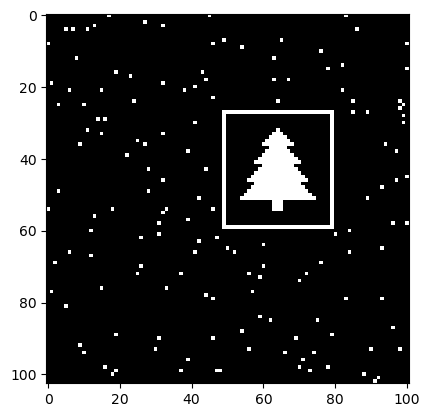

In [ ]:
import matplotlib.pyplot as plt

# real input
X_SIZE = 101
Y_SIZE = 103

instructions = load_file("./d14.txt")

init_robots = initialize_robots(instructions)
n_robots = len(init_robots)

for step in range(1, 10_000):
    init_robots = initialize_robots(instructions)
    final_pos = move_all_robots(init_robots, steps=step)
    field = construct_field(final_pos)
    distinct = np.where(field != 0, 1, 0)
    if distinct.sum() == n_robots:
        print(f"{step = }")
        break


plt.imshow(field, cmap="gray");

## Day 16

In [ ]:
# part 1
from pathlib import Path
import heapq


def in_bounds(pos: tuple[int, int], bounds: tuple[int, int]) -> bool:
    x, y = pos
    x_max, y_max = bounds
    return (0 <= x < x_max) and (0 <= y < y_max)


def find_start_end_pos(grid: list[str]) -> list[tuple[int, int]]:
    pos = []
    for p in ("S", "E"): # start, end
        for y, row in enumerate(grid):
            if p in row:
                x = row.index(p)
                pos.append((x, y))
    return pos


def rotate(face: str, turn: str) -> str:
    ORDER = ["N", "E", "S", "W"]
    idx = ORDER.index(face)
    wrp = len(ORDER)
    if turn == "L":
        return ORDER[(idx - 1) % wrp]
    else:  # "R"
        return ORDER[(idx + 1) % wrp]
    

DIRECTIONS = {
    "N": ( 0, -1), # north
    "E": ( 1,  0), # east
    "S": ( 0,  1), # south
    "W": (-1,  0), # west
}


def dijkstra_shortest_path(priorty_queue, costs, bounds, goal, stop_on_goal=True, reverse=False): 
    # dijkstra's path-finding algorithm for weighted
    while priorty_queue:
        score, pos, face = heapq.heappop(priorty_queue)

        # skip if we already have a better score
        if score > costs[(pos, face)]:
            continue

        # break on goal reached
        if stop_on_goal and pos == goal:
            return score, costs
        
        # 1. rotate left/right
        for turn in ["L", "R"]:
            new_face = rotate(face, turn)
            new_score = score + 1000
            state = (pos, new_face)
            if new_score < costs.get(state, float("inf")):
                costs[state] = new_score
                heapq.heappush(priorty_queue, (new_score, pos, new_face))

        # 2. advance by one
        dx, dy = DIRECTIONS[face]
        if not reverse:
            next_pos = (pos[0] + dx, pos[1] + dy)
        else:
            next_pos = (pos[0] - dx, pos[1] - dy)

        if in_bounds(next_pos, bounds) and maze[next_pos[1]][next_pos[0]] != "#":
            new_score = score + 1
            state = (next_pos, face)
            if new_score < costs.get(state, float("inf")):
                costs[state] = new_score
                heapq.heappush(priorty_queue, (new_score, next_pos, face))

    return None, costs
    

def solve_part1(maze: list[str]):
    height, width = len(maze), len(maze[0])
    bounds = (width, height)
    start, goal = find_start_end_pos(maze)

    # priority queue: (score, (x, y), facing)
    priorty_queue = [(0, start, "E")]
    # cost map: (pos, face) -> cost
    costs = {(start, "E"): 0}

    return dijkstra_shortest_path(priorty_queue, costs, bounds, goal)


for file in ["d16_1_test.txt", "d16_2_test.txt", "d16.txt"]:
    maze = Path(file).read_text().splitlines()
    score, costs = solve_part1(maze)
    print(score)

7036
11048
98416


In [2]:
# part 2
from pathlib import Path
from itertools import product

def solve_part2(maze: list[str]):
    height, width = len(maze), len(maze[0])
    bounds = (width, height)
    start, goal = find_start_end_pos(maze)

    # compute best score
    priorty_queue = [(0, start, "E")]
    costs = {(start, "E"): 0}
    best_score, _ = dijkstra_shortest_path(priorty_queue, costs, bounds, goal)

    # compute forward costs
    priorty_queue = [(0, start, "E")]
    costs = {(start, "E"): 0}
    _, forward_costs = dijkstra_shortest_path(priorty_queue, costs, bounds, goal=goal, stop_on_goal=True, reverse=False)

    # compute backward costs
    priorty_queue = [(0, goal, d) for d in DIRECTIONS]
    costs = {(goal, d): 0 for d in DIRECTIONS}
    _, backward_costs = dijkstra_shortest_path(priorty_queue, costs, bounds, goal=start, stop_on_goal=False, reverse=True)

    # count optimal positions
    optimal_positions = set()
    positions = product(range(width), range(height))
    for pos in positions:
        x, y = pos
        if maze[y][x] == "#":
            continue
        for d in DIRECTIONS:
            fc = forward_costs.get((pos, d), float("inf"))
            bc = backward_costs.get((pos, d), float("inf"))
            if fc + bc == best_score:
                optimal_positions.add(pos)

    return len(optimal_positions)


for file in ["d16_1_test.txt", "d16_2_test.txt", "d16.txt"]:
    maze = Path(file).read_text().splitlines()
    spots = solve_part2(maze)
    print(spots)

45
64
471


## Day 17

In [1]:
# 1st half
from pathlib import Path

def prepare(lines: str) -> tuple[int, int, int, list[int]]:
    a, b, c = [int(lines[i].split(" ")[-1]) for i in range(3)]
    program = list(map(int, lines[4].split(" ")[1].split(",")))
    return a, b, c, program


def get_combo(operand: int, a: int, b: int, c: int) -> int:
    if operand <= 3: 
        return operand
    if operand == 4:
        return a
    if operand == 5:
        return b
    if operand == 6:
        return c
    # else:
    #     raise ValueError(f"operand should not be: {operand}")

def run_program(a: int, b: int, c: int, program: list[int]) -> list[int]:
    output = []
    ind = 0 # pointer on program array

    while ind < len(program):
        opcode = program[ind]
        operand = program[ind+1]
        combo = get_combo(operand, a, b, c)

        # print(f"{a=}, {b=}, {c=}, {opcode=}, {operand=}, {combo=}")
        if opcode == 0:
            a //= (2 ** combo)
        if opcode == 1:
            b ^= operand # b XOR op assigned to b
        if opcode == 2:
            b = combo % 8
        if opcode == 3 and a != 0:
            ind = operand
            continue
        if opcode == 4:
            b ^= c # b XOR c assigned to b
        if opcode == 5:
            output.append(combo % 8)
        if opcode == 6:
            b = a // (2 ** combo)
        if opcode == 7:
            c = a // (2 ** combo)
        
        ind += 2

    return output


# process 1st half
payload = Path("d17.txt").read_text().splitlines()
a, b, c, program = prepare(payload)
output = run_program(a, b, c, program)
",".join(map(str, output))

'2,1,0,1,7,2,5,0,3'

In [2]:
# 2nd half

def run_one_step(a: int, program: list[int]) -> int:
    b = 0
    c = 0
    ind = 0

    while ind < len(program):
        opcode = program[ind]
        operand = program[ind+1]
        combo = get_combo(operand, a, b, c)

        if opcode == 0:
            a //= (2 ** combo)
        if opcode == 1:
            b ^= operand
        if opcode == 2:
            b = combo % 8
        if opcode == 3 and a != 0:
            ind = operand
            continue
        if opcode == 4:
            b ^= c 
        if opcode == 5:
            return combo % 8 # 1st output: break
        if opcode == 6:
            b = a // (2 ** combo)
        if opcode == 7:
            c = a // (2 ** combo)
        
        ind += 2

def part2(payload: str) -> int:
    a, _, _, target = prepare(payload)
    N = len(target)

    possible_As = {0}
    for i in reversed(range(0, N)):
        desired_output = target[i]
        next_As = set()

        for a in possible_As:
            for digit in range(8):
                candidate = digit + 8 * a
                output = run_one_step(a=candidate, program=target)

                if output == desired_output:
                    next_As.add(candidate)

        possible_As = next_As

    return min(possible_As)


payload = Path("d17.txt").read_text().splitlines()
part2(payload)

267265166222235

## Day 18

In [1]:
from pathlib import Path
from collections import deque


def replace_str(string: str, repl: str, i: int) -> str:
    return f"{string[:i]}{repl}{string[i+1:]}"


def build_grid(positions: list[tuple[int, int]]) -> list[str]:
    x_max = max(x for x, _ in positions)
    y_max = max(y for _, y in positions)
    size = max(x_max, y_max) + 1

    first = 1024
    memory_grid = ["." * size for _ in range(size)]

    for x, y in positions[:first]:
        memory_grid[y] = replace_str(memory_grid[y], repl="#", i=x)

    return memory_grid


def find_shortest_dist(memory_grid: list[str]) -> int:
    height, width = len(memory_grid), len(memory_grid[0])
    DIRECTIONS = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    visited = set()
    queue = deque([(0, 0, 0)])  # dist, x, y
    goal = (width - 1, height - 1)

    while queue:
        dist, x, y = queue.popleft()
        curr_pos = (x, y)

        if curr_pos in visited:
            continue
        visited.add(curr_pos)

        if curr_pos == goal:
            return dist

        for dx, dy in DIRECTIONS:
            xx, yy = x + dx, y + dy
            if 0 <= xx < width and 0 <= yy < height:
                if memory_grid[yy][xx] == ".":
                    queue.append((dist + 1, xx, yy))

    return None
                    

positions = Path("d18.txt").read_text().splitlines()
positions = [tuple(map(int, pos.split(","))) for pos in positions]
memory_grid = build_grid(positions)
shortest_dist = find_shortest_dist(memory_grid)
print(shortest_dist)

308


In [2]:
# part 1: visualization
def find_shortest_path(memory_grid: list[str]):
    height, width = len(memory_grid), len(memory_grid[0])
    DIRECTIONS = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    visited = set()
    start_pos = (0, 0)
    queue = deque([(0, *start_pos)])  # dist, x, y
    goal_pos = (width - 1, height - 1)

    came_from = dict() #  (x, y) -> (x_prev, y_prev) 

    while queue:
        dist, x, y = queue.popleft()
        curr_pos = (x, y)

        if curr_pos in visited:
            continue
        visited.add(curr_pos)

        if curr_pos == goal_pos:
            # reconstruct path
            path = [curr_pos]
            while curr_pos != start_pos:
                curr_pos = came_from[curr_pos]
                path.append(curr_pos)
            path.reverse()
            return path

        for dx, dy in DIRECTIONS:
            xx, yy = x + dx, y + dy
            if 0 <= xx < width and 0 <= yy < height:
                if memory_grid[yy][xx] == ".":
                    queue.append((dist + 1, xx, yy))
                if (xx, yy) not in came_from:
                    came_from[(xx, yy)] = curr_pos

    return []


positions = Path("d18.txt").read_text().splitlines()
positions = [tuple(map(int, pos.split(","))) for pos in positions]
memory_grid = build_grid(positions)
shortest_path = find_shortest_path(memory_grid)

for x, y in shortest_path:
    memory_grid[y] = replace_str(memory_grid[y], repl="0", i=x)

print("\n".join(memory_grid))

0000000000000..#.......................................................
.###########0##...#....................................................
.#...#00000#000#.......................................................
.#.###0###0###0#.......#...............................................
.#...#0#..00000#.#.#...#...............................................
.###.#0#######.#.#.....................................................
.....#000#...#.#...#...................................................
########0#.#.#.#.....#.................................................
000000000#.#.#.#...#...................................................
0########..#.#.#.#.#0000000#0000000000000000000000000000000000000000000
00000#...#.#...#.#..0#.#..000#...#...................#.#.....#...#....0
.###0#.#.#.#####.#..0#........................................####.###0
...#0#...#.....#....0#...........................................#...#0
##.#0#.#####.#######0####...#...................................

In [3]:
# part 2
def build_grid(positions: list[tuple[int, int]], num: int) -> list[str]:
    x_max = max(x for x, _ in positions) + 1
    y_max = max(y for _, y in positions) + 1

    memory_grid = ["." * x_max for _ in range(y_max)]

    for x, y in positions[:num]:
        memory_grid[y] = replace_str(memory_grid[y], repl="#", i=x)

    return memory_grid

def find_shortest_dist(memory_grid: list[str]) -> bool:
    height, width = len(memory_grid), len(memory_grid[0])
    DIRECTIONS = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    visited = set()
    queue = deque([(0, 0, 0)])  # dist, x, y
    goal = (width - 1, height - 1)

    while queue:
        dist, x, y = queue.popleft()
        curr_pos = (x, y)

        if curr_pos in visited:
            continue
        visited.add(curr_pos)

        if curr_pos == goal:
            return True

        for dx, dy in DIRECTIONS:
            xx, yy = x + dx, y + dy
            if 0 <= xx < width and 0 <= yy < height:
                if memory_grid[yy][xx] == ".":
                    queue.append((dist + 1, xx, yy))

    return False


def find_path_block(positions: list[tuple[int, int]]) -> tuple[int, int]:
    solvable = True
    num = 1024
    while solvable:
        num += 1
        memory_grid = build_grid(positions, num=num)
        solvable = find_shortest_dist(memory_grid)
    
    return positions[num - 1]
    

positions = Path("d18.txt").read_text().splitlines()
positions = [tuple(map(int, pos.split(","))) for pos in positions]
blocker = find_path_block(positions)

print(blocker)

(46, 28)


## Day 19

In [ ]:
# 1st half
from functools import lru_cache

def get_components_products(payload):
    components, products = payload.split("\n\n")
    components = components.split(", ")
    products = products.split()

    return components, products

def process_step1(payload: str) ->  list[str]:
    components, products = get_components_products(payload)

    # cannot hash a list of components for caching as func parameter
    # so we have to scope this function inside another
    @lru_cache(None)
    def can_build_product(product: str) -> bool:
        if len(product) == 0:
            return True
        
        for component in components:
            if product.startswith(component):
                remaining_product = product[len(component):]
                
                if can_build_product(remaining_product):
                    return True
        
        return False

    possible_products = []
    for p in products:
        if can_build_product(p):
            possible_products.append(p)

    return possible_products


payload = load_file("./d19.txt")
possible_products = process_step1(payload)
len(possible_products)

344

In [ ]:
# 2nd half

def process_step2(payload: str):
    components, products = get_components_products(payload)

    @lru_cache(None)
    def count_possible(product: str) -> int:
        if len(product) == 0:
            return 1

        count = 0
        for component in components:
            if product.startswith(component):
                remaining_product = product[len(component):]
                count += count_possible(remaining_product)

        return count
    
    possible_combs = dict()
    for p in products:
        if count_possible(p):
            possible_combs[p] = count_possible(p)

    return possible_combs

payload = load_file("./d19.txt")
possible_combs = process_step2(payload)
sum(possible_combs.values())

996172272010026

## Day 22

In [ ]:
def mul_64(secret):
    return secret * 64

def div_32(secret):
    return secret // 32

def mul_2048(secret):
    return secret * 2048 

def mix(secret, num):
    return secret ^ num

def prune(secret):
    return secret % 16777216


def step1(secret):
    temp = mul_64(secret)
    temp = mix(secret, temp)
    temp = prune(temp)
    return temp

def step2(secret):
    temp = div_32(secret)
    temp = mix(secret, temp)
    temp = prune(temp)
    return temp

def step3(secret):
    temp = mul_2048(secret)
    temp = mix(secret, temp)
    temp = prune(temp)
    return temp


def simulate(secret, times=2000):
    temp = secret
    for _ in range(times):
        temp = step3(step2(step1(temp)))
    
    return temp
        
def process_part1(payload: str) -> int:
    secrets = list(map(int, payload.splitlines()))
    last_secret = map(simulate, secrets)
    return sum(last_secret)

payload = load_file("d22.txt")
sum_secrets = process_part1(payload)
print(sum_secrets)

17005483322


In [ ]:
from collections import defaultdict

def get_init_secrets(payload):
    return  list(map(int, payload.splitlines()))
    

def simulate2(secret, times=2000):
    all_secrets = []
    temp = secret
    for _ in range(times):
        temp = step3(step2(step1(temp)))
        all_secrets.append(temp)
    return all_secrets


def get_all_secrets(secrets):
    return {s: simulate2(s) for s in secrets}


def last_digit(n):
    return n % 10


def get_prices(monkeys):
    return {k: list(map(last_digit, v)) for k, v in monkeys.items()}


def get_deltas(buyers_prices):
    return {k: [b - a for a, b in zip(prices, prices[1:])] for k, prices in buyers_prices.items()}

payload = load_file("d22.txt")
secrets = get_init_secrets(payload)
monkeys = get_all_secrets(secrets)
buyers_prices = get_prices(monkeys)
buyers_deltas = get_deltas(buyers_prices)


pattern_to_prices = defaultdict(list)

for buyer, deltas in buyers_deltas.items():
    prices = buyers_prices[buyer]
    for i in range(len(deltas) - 3):
        pattern = tuple(deltas[i:i+4])
        price = prices[i+4]

        if pattern not in pattern_to_prices or len(pattern_to_prices[pattern]) < len(monkeys):
            pattern_to_prices[pattern].append((buyer, price))


# search for best sales pattern
best_pattern = None
max_bananas = 0

for pattern, buyer_prices in pattern_to_prices.items():
    seen = set()
    total = 0
    for buyer, price in buyer_prices:
        if buyer not in seen:
            seen.add(buyer)
            total += price
    if total > max_bananas:
        max_bananas = total
        best_pattern = pattern

print(best_pattern)
print(max_bananas)

(1, -1, 0, 1)
1910


## Day 23

In [ ]:
from itertools import combinations
from collections import defaultdict

def process_step1(payload: str) -> int:
    edges = [pair.split("-") for pair in payload.splitlines()]

    graph = defaultdict(set)
    for edge in edges:
        a, b = edge
        graph[a].add(b)
        graph[b].add(a)


    triples = set()
    for a in graph:
        for b, c in combinations(graph[a], 2):
            if b in graph[c]:
                trip = tuple(sorted([a, b, c]))
                triples.add(trip)

    return len([t for t in triples if any(node.startswith("t") for node in t)])



payload = load_file("d23.txt")
n_relevant_triples = process_step1(payload)
print(n_relevant_triples)

1253


In [ ]:
import networkx as nx


def process_step2(payload: str) -> str:
    edges = [pair.split("-") for pair in payload.splitlines()]

    graph = nx.Graph()
    graph.add_edges_from(edges)

    cliques = list(nx.find_cliques(graph))
    largest_clique = max(cliques, key=len)

    password = ",".join(sorted(largest_clique))
    return password


payload = load_file("d23.txt")
password = process_step2(payload)
print(password)

ag,bt,cq,da,hp,hs,mi,pa,qd,qe,qi,ri,uq


## Day 24

In [1]:
# part 1
from pathlib import Path
import operator


def parse_inputs(payload: str) -> tuple[dict, dict]:
    raw_values, raw_instructions = payload.split("\n\n")
    values = {k: int(v) for k, v in (line.split(": ") for line in raw_values.splitlines())}

    gates = {}
    for line in raw_instructions.splitlines():
        in1, op, in2, _, out = line.split()
        gates[out] = (op, in1, in2)

    return values, gates


OPS = {
    "AND": operator.and_,
    "OR": operator.or_,
    "XOR": operator.xor,
}

# recursive evaluation
def evaluate(wire: str, values: dict, gates: dict):
    if wire in values:
        return values[wire]
    if wire not in gates:
        raise ValueError(f"No source for wire {wire}")
    
    op, in1, in2 = gates[wire]
    val1 = evaluate(in1, values, gates)
    val2 = evaluate(in2, values, gates)
    result = OPS[op](val1, val2)
    values[wire] = result  # memoize
    return result


payload = Path("d24.txt").read_text()
values, gates = parse_inputs(payload)

z_wires = sorted([w for w in gates if w.startswith("z")])
bits = [evaluate(w, values, gates) for w in z_wires]

binary_str = "".join(str(b) for b in reversed(bits))
decimal_value = int(binary_str, 2)

print(binary_str)
print(decimal_value)

1110101110010100010001001110110001010001110000
64755511006320


**Part 2: Observations**

Steps
* parse all gates into a dependency graph
* validate each bit position
* detect any bit where the logic graph deviates
* identify which gate(s) is incorrectly connected
* locate which wire the gate should be connected to
* records the swap
* continue until all swaps are discovered

Summary Pseudocode
```

parse input -> gates, values

extract bit_count from max xNN/yNN/zNN

swapped_wires = set()

for i in 0..bit_count-1:
    slice = find_all_gates_related_to_bits(i)
    correct_structure = build_expected_adder_for_bit(i)

    mismatches = compare_structure(slice, correct_structure)

    for (wrong_wire, expected_wire) in mismatches:
        swapped_wires.add(wrong_wire)
        swapped_wires.add(expected_wire)

stop when len(swapped_wires) == 8

return sorted(swapped_wires)
```

In [75]:
# part 2
import re

def get_z_gates(gates):
    return sorted([w for w in gates if w.startswith("z")])


def extract_max_bit(payload: str) -> list[str]:
    bits = []
    for w in list("xyz"):
        max_ = max(re.findall(f"{w}\d+", payload))
        bits.append(max_)
    return bits 


def resolve(wire: str, values: dict, gates: dict):
    base_wires = ("x", "y")
    
    op, a, b = gates[wire]
    print(f"{wire} <- {a} {op} {b}")
    bottom = []

    if not a.startswith(base_wires):
        bottom.append(a)
        bottom.extend(resolve(a, values, gates))

    if not b.startswith(base_wires):
        bottom.append(b)
        bottom.extend(resolve(b, values, gates))

    if a.startswith(base_wires) and b.startswith(base_wires):
        bottom.append(a)
        bottom.append(b)
        return bottom

    return bottom


payload = Path("d24_test.txt").read_text()
values, gates = parse_inputs(payload)
xyz_max = extract_max_bit(payload)
z09 = resolve("z09", values, gates)
z09

z09 <- qhw XOR tgd
qhw <- djm OR pbm
djm <- y00 AND y03
pbm <- y01 AND x02
tgd <- psh XOR fgs
psh <- y03 OR y00
fgs <- y04 OR y02


['qhw',
 'djm',
 'y00',
 'y03',
 'pbm',
 'y01',
 'x02',
 'tgd',
 'psh',
 'y03',
 'y00',
 'fgs',
 'y04',
 'y02']

## Day 25: Code Chronicle

In [ ]:
from pathlib import Path
from itertools import product


def count_pins(s: str) -> int:
    return s.count("#") - 1

def transpose(schema: list[str]) -> list[str]:
    return ["".join(line) for line in zip(*schema)]


def create_key_lock_pins(schematics: list[list[str]]) -> tuple[list[int], list[int]]: 
    keys = []
    locks = []
    for schema in schematics:
        # transpose to count pins downward
        schema_t = transpose(schema)
        pins = list(map(count_pins, schema_t))

        # locks start with '#'
        if schema[0][0] == "#":
            locks.append(pins)
        else:
            keys.append(pins)

    return keys, locks


def count_all_possible_pairs(keys: list[int], locks: list[int]) -> int:
    count = 0
    key_lock_combo = product(keys, locks)

    for key, lock in key_lock_combo:
        count += all(k + l <= 5 for k, l in zip(key, lock))

    return count

schematics = Path("d25.txt").read_text().split("\n\n")
schematics = [schema.splitlines() for schema in schematics]

keys, locks = create_key_lock_pins(schematics)
count = count_all_possible_pairs(keys, locks)
count

3162